In [1]:
import os
import shutil
from collections import defaultdict

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import matplotlib
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
matplotlib.rcParams['image.cmap'] = 'gray'

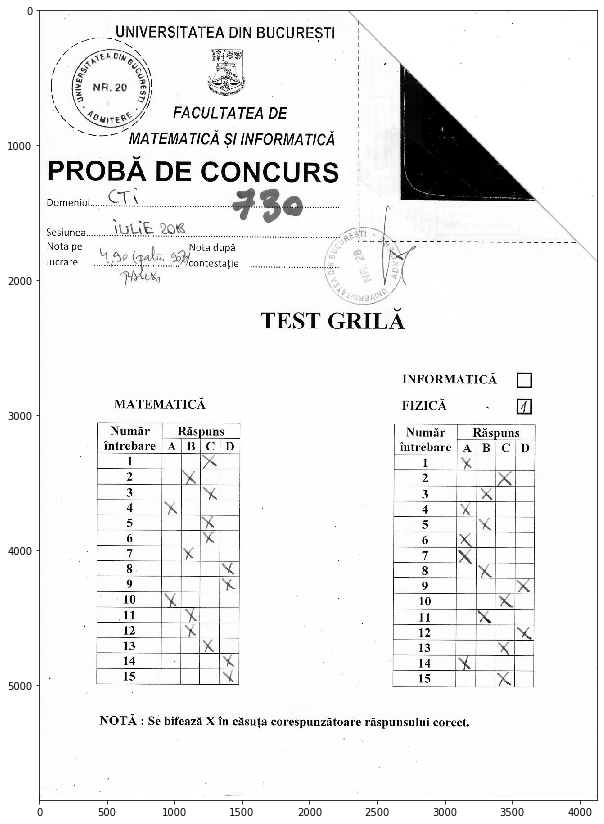

In [27]:
FILENAME = "data/exemple_corecte/image_1.jpg"
img = cv2.imread(FILENAME)

plt.figure(figsize=(10,20))
plt.imshow(gray)

In [39]:
def img_to_bin(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    (thresh, img_bin) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # Invert the image
    img_bin = 255 - img_bin
    
    return img_bin

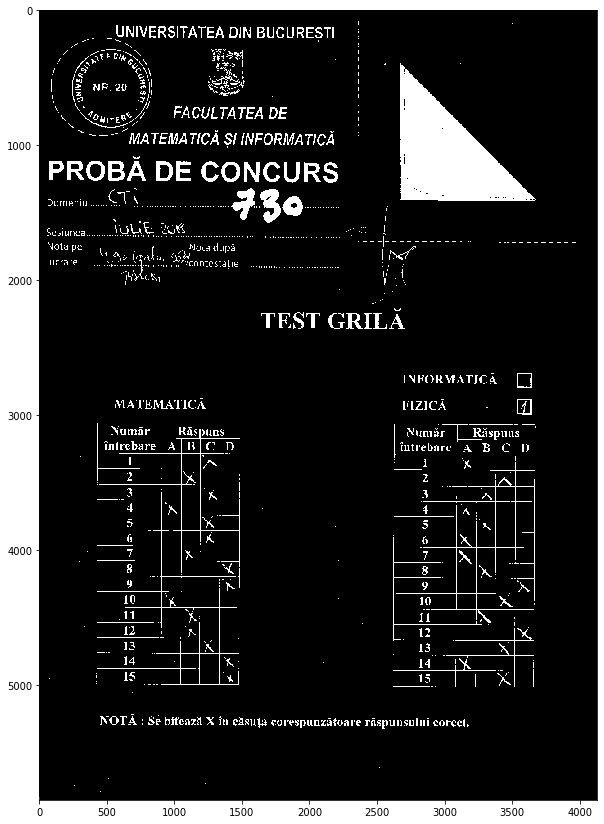

In [40]:
# Thresholding the image
img_bin = img_to_bin(img)
plt.figure(figsize=(10, 20))
plt.imshow(img_bin)

In [37]:
def test_kernel_length(img_bin, x):
    # Defining a kernel length
    kernel_length = np.array(img_bin).shape[1]//x

    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(10, 20))
    ax1.imshow(verticle_lines_img)
    ax1.axis('off')

    ax2.imshow(horizontal_lines_img)
    ax2.axis('off')
    plt.show()
    
    return horizontal_lines_img, verticle_lines_img, kernel

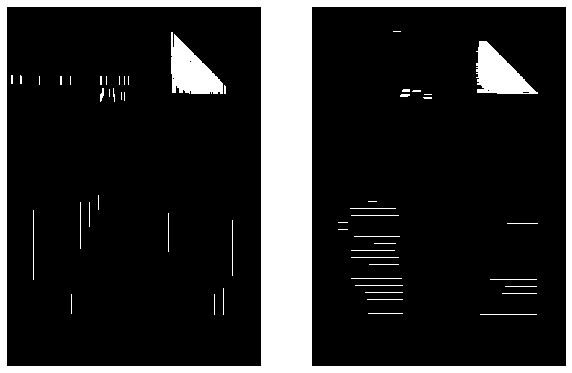

In [38]:
horizontal_lines_img, verticle_lines_img, kernel = test_kernel_length(img_bin, 100)

In [31]:
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
def combine_imgs(verticle_lines_img, horizontal_lines_img, alpha, beta):
    img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
    img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
    (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    return img_final_bin

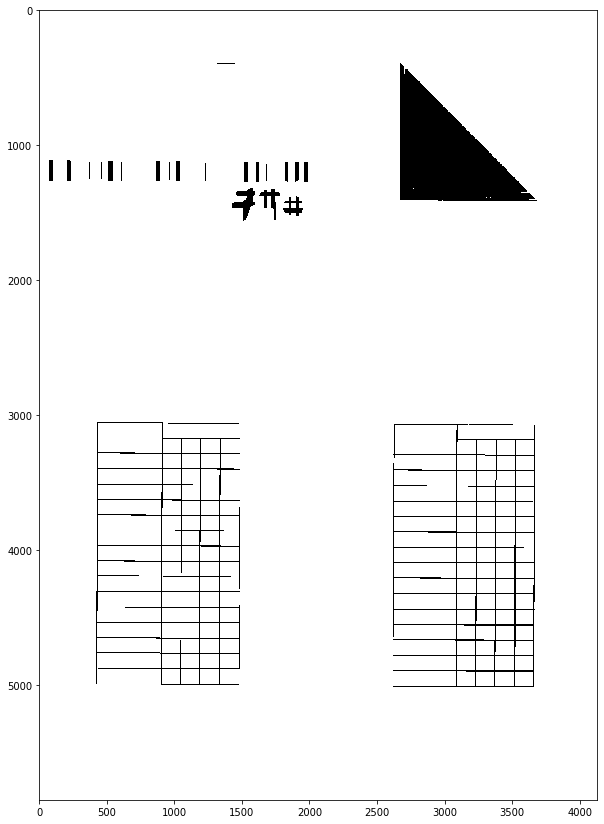

In [32]:
img_final_bin = combine_imgs(verticle_lines_img, horizontal_lines_img, alpha, beta)
plt.figure(figsize=(10,20))
plt.imshow(img_final_bin)

In [33]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0

    # handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True

    # handle if we are sorting against the y-coordinate rather than
    # the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1

    # construct the list of bounding boxes and sort them from top to
    # bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))

    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [84]:
contours, hierarchy = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="bottom-to-top")

In [85]:
question_boxes = []
for (x, y, w, h) in boundingBoxes:
    if w > 900 and h > 1500 and h < 3000:
        question_boxes.append((x, y, w, h))

2617 3061 1059 1952
424 3051 1069 1946


/home/matei/anaconda3/envs/Computer-Vision-Course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  
/home/matei/anaconda3/envs/Computer-Vision-Course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  


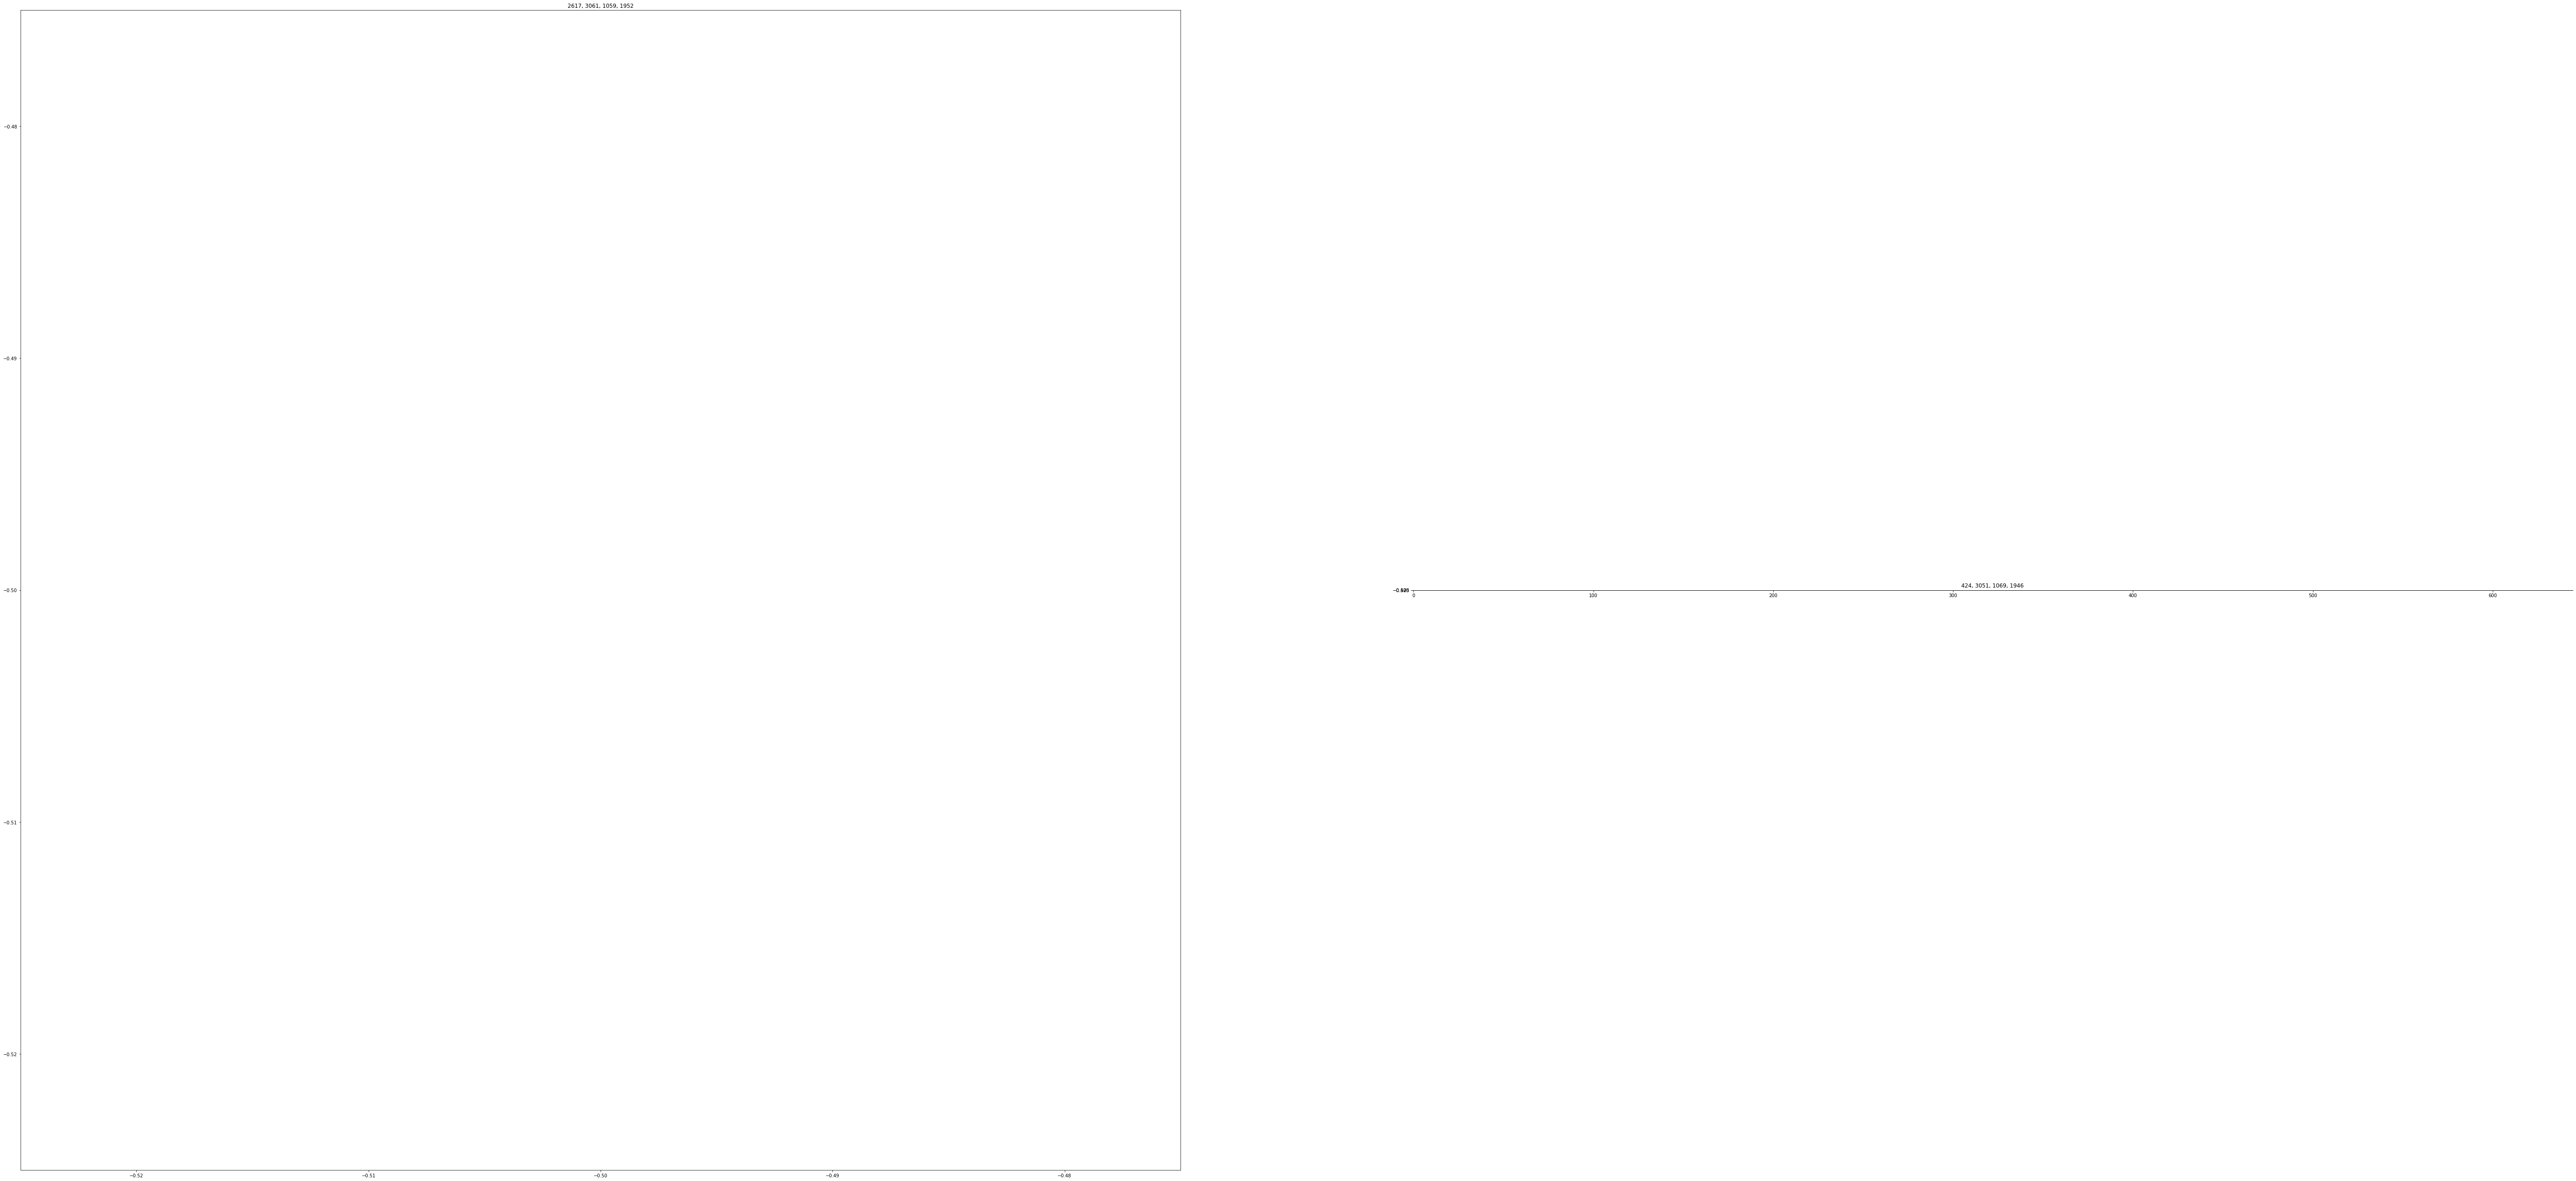

In [86]:
fig, ax = plt.subplots(1, len(question_boxes), figsize=(100, 100))

for i, (x, y, w, h) in enumerate(question_boxes):
    print(x, y, w, h)
    ax[i].set_title(f"{x}, {y}, {w}, {h}")
    ax[i].imshow(img[y:y+h, x:x+w])

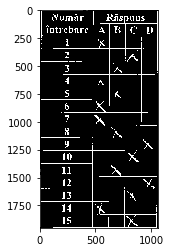

In [87]:
x, y, w, h = question_boxes[0]

box = img_bin[y:y+h, x:x+w]
plt.imshow(box)

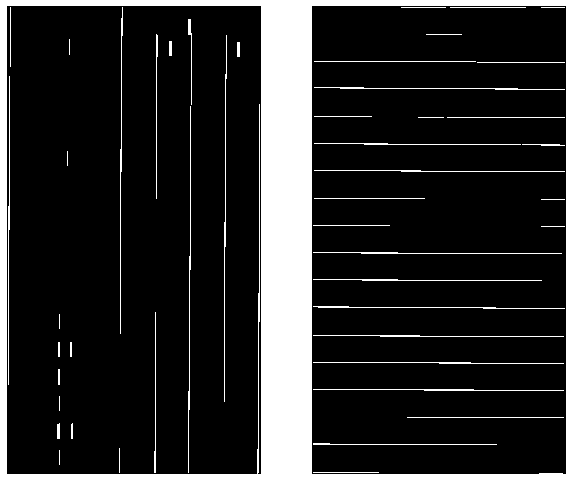

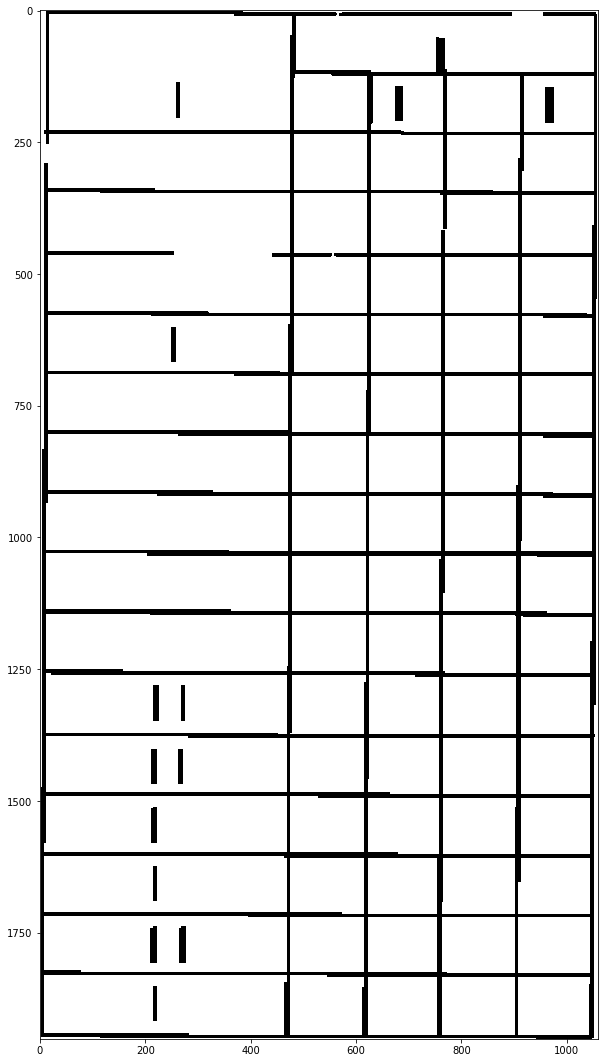

In [88]:
horizontal_lines_img, verticle_lines_img, kernel = test_kernel_length(box, 50)
final_box = combine_imgs(verticle_lines_img, horizontal_lines_img, alpha, beta)
plt.figure(figsize=(10, 20))
plt.imshow(final_box)

In [98]:
contours, hierarchy = cv2.findContours(final_box, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Sort all the contours by top to bottom.
(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
len(boundingBoxes)

91

In [99]:
print(boundingBoxes)

((0, 0, 1059, 1952), (566, 3, 330, 9), (18, 7, 460, 220), (482, 121, 139, 106), (918, 125, 133, 106), (772, 125, 139, 106), (628, 125, 136, 106), (257, 136, 9, 70), (673, 143, 16, 69), (957, 146, 19, 70), (628, 235, 136, 106), (482, 235, 139, 106), (915, 238, 136, 106), (772, 238, 139, 106), (15, 345, 459, 229), (628, 348, 280, 113), (482, 348, 139, 226), (915, 351, 136, 110), (915, 468, 133, 109), (768, 468, 140, 106), (628, 468, 133, 106), (15, 578, 459, 109), (915, 581, 133, 106), (768, 581, 140, 106), (628, 581, 133, 106), (482, 581, 139, 106), (247, 600, 12, 69), (15, 691, 456, 106), (915, 695, 133, 106), (768, 695, 140, 106), (628, 695, 133, 106), (478, 695, 143, 106), (15, 805, 456, 109), (915, 808, 133, 109), (768, 808, 140, 106), (625, 808, 136, 106), (478, 808, 140, 106), (12, 918, 459, 109), (912, 921, 136, 106), (768, 921, 136, 106), (625, 921, 136, 106), (478, 921, 140, 106), (12, 1031, 459, 110), (912, 1035, 136, 109), (765, 1035, 139, 106), (625, 1035, 136, 106), (478, 1

In [100]:
good_imgs = []
for (x, y, w, h) in boundingBoxes:
    if w > 50 and h > 50:
        good_imgs.append(box[y:y+h, x:x+w])

In [101]:
from math import floor, ceil

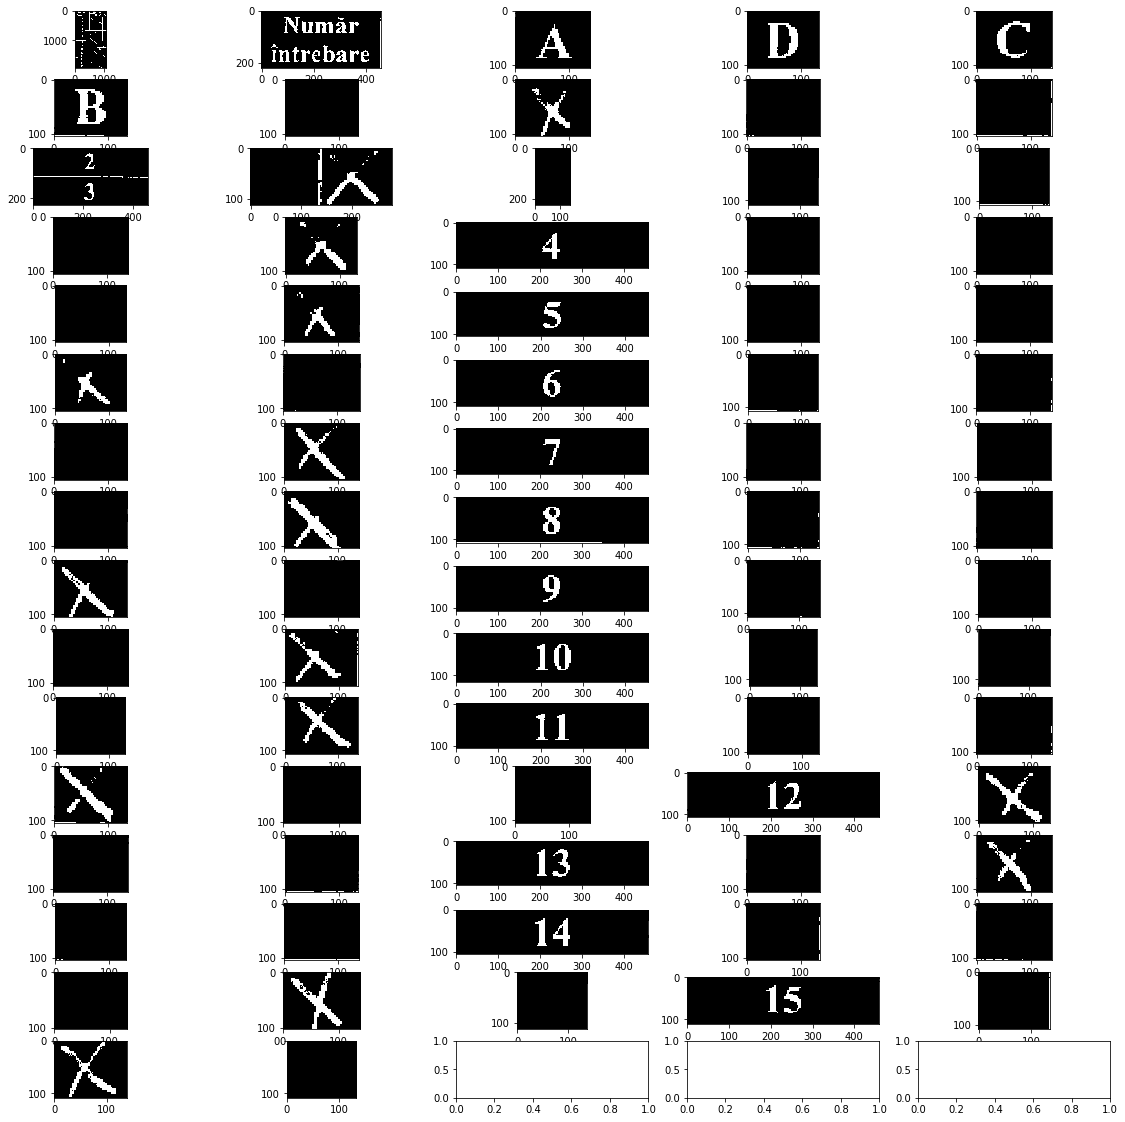

In [102]:
fig, ax = plt.subplots(ceil(len(good_imgs)/5), 5, figsize=(20, 20))

for index, img in enumerate(good_imgs):
    ax[floor(index/5)][index % 5].imshow(img)
    

In [81]:
import math
math.floor(3/4)

0